In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train_data = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
df = train_data[['Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status','Credit_History']]

In [12]:
df.fillna(method='ffill',inplace=True)

/home/deepanshu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [13]:
df.shape

(614, 8)

In [18]:
df.drop_duplicates(inplace=True)

/home/deepanshu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df.shape

(612, 8)

/home/deepanshu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


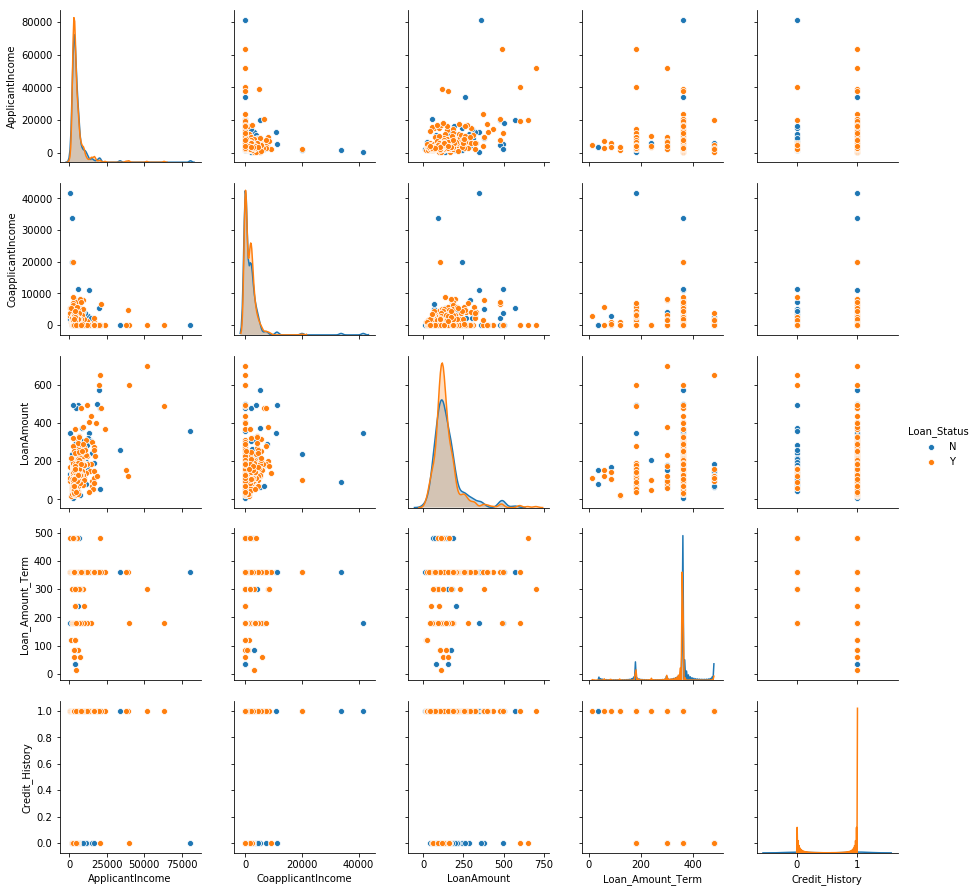

In [20]:
sns.pairplot(df,hue='Loan_Status')

In [21]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116498,0.533357,-0.042809,-0.020116
CoapplicantIncome,-0.116498,1.000000,0.189913,-0.067242,0.009593
LoanAmount,0.533357,0.189913,1.000000,0.023961,-0.012741
Loan_Amount_Term,-0.042809,-0.067242,0.023961,1.000000,-0.032263
Credit_History,-0.020116,0.009593,-0.012741,-0.032263,1.000000


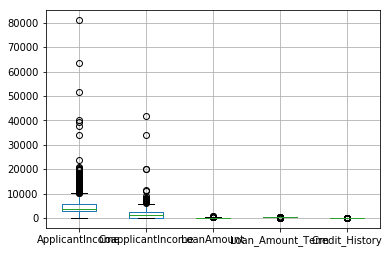

In [22]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34409d5390>,
      dtype=object)

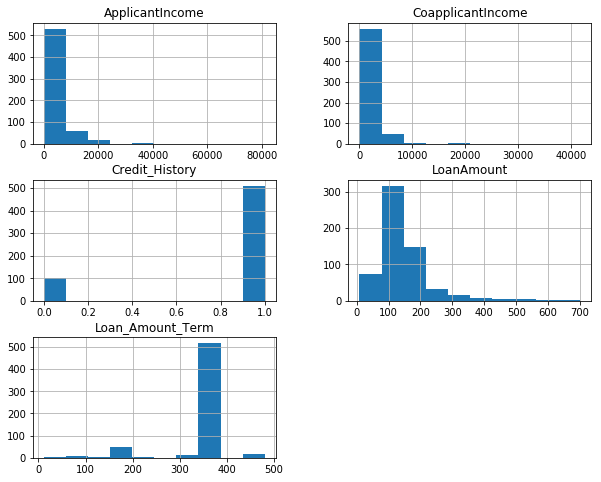

In [23]:
df.hist(figsize=(10,8))

In [24]:
df.quantile()

ApplicantIncome      3806.0
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
Name: 0.5, dtype: float64

In [25]:
df.mean()

ApplicantIncome      5404.480392
CoapplicantIncome    1622.539085
LoanAmount            147.442810
Loan_Amount_Term      341.568627
Credit_History          0.834967
dtype: float64

In [26]:
df.dtypes

Dependents            object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Loan_Status           object
Credit_History       float64
dtype: object

In [28]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [39]:
df['Dependents'].replace('3+',3,inplace=True)
df['Dependents'] = df['Dependents'].astype('int')
df['Self_Employed'].replace('Yes',1,inplace = True)
df['Self_Employed'].replace('No',0,inplace = True)
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace("N",0,inplace=True)

/home/deepanshu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
df.dtypes

Dependents             int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Loan_Status            int64
Credit_History       float64
dtype: object

In [41]:
z = np.abs(stats.zscore(df))
print(z)

[[0.23414309 0.40434898 0.13436382 ... 0.28052978 1.48465096 0.44458032]
 [0.75410224 2.47311121 0.3932841  ... 0.28052978 0.67355899 0.44458032]
 [0.75410224 0.40434898 0.46148989 ... 0.28052978 0.67355899 0.44458032]
 ...
 [0.23414309 0.40434898 0.4363076  ... 0.28052978 0.67355899 0.44458032]
 [1.22238843 0.40434898 0.35632527 ... 0.28052978 0.67355899 0.44458032]
 [0.75410224 2.47311121 0.13436382 ... 0.28052978 1.48465096 2.24931233]]


In [42]:
threshold = 3
print(np.where(z > 3))

(array([  8,  13,  67,  93, 125, 129, 132, 154, 154, 170, 170, 176, 176,
       182, 184, 241, 261, 277, 307, 312, 332, 332, 368, 401, 408, 416,
       442, 485, 493, 495, 504, 521, 522, 544, 559, 573, 579, 583, 598,
       602, 603]), array([3, 5, 5, 5, 2, 4, 5, 2, 4, 2, 4, 3, 4, 2, 2, 5, 5, 4, 4, 5, 2, 4,
       4, 3, 2, 3, 2, 4, 5, 5, 4, 4, 4, 5, 4, 5, 3, 5, 3, 4, 4]))


In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Dependents              2.00
Self_Employed           0.00
ApplicantIncome      2909.25
CoapplicantIncome    2287.75
LoanAmount             68.00
Loan_Amount_Term        0.00
Loan_Status             1.00
Credit_History          0.00
dtype: float64


In [44]:
df = df[(z < 3).all(axis=1)]

In [45]:
df.shape

(575, 8)

In [46]:
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History
1,1,0,4583,1508.0,128.0,360.0,0,1.0
2,0,1,3000,0.0,66.0,360.0,1,1.0
3,0,0,2583,2358.0,120.0,360.0,1,1.0
4,0,0,6000,0.0,141.0,360.0,1,1.0
5,2,1,5417,4196.0,267.0,360.0,1,1.0


In [47]:
df = shuffle(df)

In [48]:
target = df[['Loan_Status']]

In [49]:
df.drop(columns=['Loan_Status'],inplace=True)

In [50]:
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.2)

In [51]:
x_train.shape

(460, 7)

In [52]:
x_test.shape

(115, 7)

In [53]:
y_train.shape

(460, 1)

In [54]:
y_test.shape

(115, 1)

In [55]:
def find_accuracy_conf_matrix(y_test,pred):
    print(confusion_matrix(y_test,pred))    
    print('accuracy is ',accuracy_score(y_test,pred)*100)

In [56]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
find_accuracy_conf_matrix(y_test,tree.predict(x_test))

[[18 15]
 [10 72]]
accuracy is  78.26086956521739


In [57]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
find_accuracy_conf_matrix(y_test,log_reg.predict(x_test))

/home/deepanshu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/deepanshu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[16 17]
 [ 1 81]]
accuracy is  84.34782608695653


In [72]:
new_test_df = test_data[['Loan_ID','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [78]:
new_test_df.replace('No',0,inplace=True)
new_test_df.replace('Yes',1,inplace=True)
new_test_df['Dependents'].replace('3+',3,inplace=True)
new_test_df['Dependents'] = new_test_df['Dependents'].astype('int')

/home/deepanshu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/home/deepanshu/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/deepanshu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after rem

In [79]:
new_test_df.ffill(inplace=True)

/home/deepanshu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [84]:
prediction = log_reg.predict(new_test_df[['Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]).tolist()

In [88]:
sub = dict({
    'Loan_ID':new_test_df.Loan_ID,
    'Loan_Status':prediction
})

In [93]:
final_sub = pd.DataFrame(sub)
final_sub['Loan_Status'].replace(0,'N',inplace=True)
final_sub['Loan_Status'].replace(1,'Y',inplace=True)

In [94]:
final_sub.to_csv('Submission_file.csv')

In [95]:
final_sub

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y
